# Grid Search CV

In [1]:
import pandas as pd

# Load the CSV file into a DataFrame
data = pd.read_csv('Social_Network_Ads.csv')

# Display the first few rows to understand the structure
print(data.head())


   Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0


In [2]:
# Separating features and target variable
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']


In [3]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)


In [5]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier
clf = RandomForestClassifier(random_state=42)

# Train the classifier on the scaled training data
clf.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [6]:
# Predict on the test set
y_pred = clf.predict(X_test_scaled)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")


Accuracy: 0.8875
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91        52
           1       0.81      0.89      0.85        28

    accuracy                           0.89        80
   macro avg       0.87      0.89      0.88        80
weighted avg       0.89      0.89      0.89        80



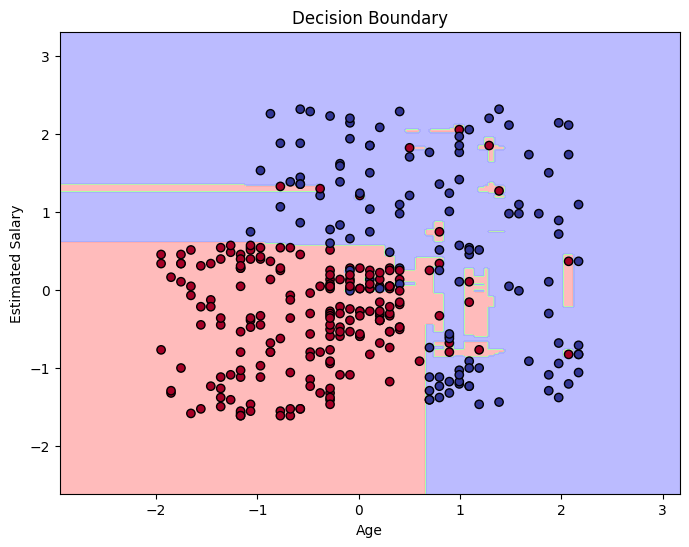

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define a function to plot the decision boundary
def plot_decision_boundary(classifier, X, y):
    h = 0.02  # step size in the mesh

    # Create a mesh grid of points based on feature ranges
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict the class for each mesh point
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Create a color plot to represent the decision boundary
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

    # Plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.title('Decision Boundary')

    plt.show()

# Using the previously trained RandomForestClassifier
plot_decision_boundary(clf, X_train_scaled, y_train)


# K Fold Cross Validation 

In [8]:
import pandas as pd

# Load the CSV file into a DataFrame
data = pd.read_csv('Social_Network_Ads.csv')

# Separating features and target variable
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier
clf = RandomForestClassifier(random_state=42)

# Perform K-fold cross-validation (let's say with 5 folds)
num_folds = 5
scores = cross_val_score(clf, X_scaled, y, cv=num_folds)

# Display the accuracy scores for each fold
for i, score in enumerate(scores, 1):
    print(f"Fold {i}: {score}")

# Calculate the mean and standard deviation of the scores
mean_score = scores.mean()
std_dev = scores.std()

print(f"Mean Accuracy: {mean_score}")
print(f"Standard Deviation: {std_dev}")


Fold 1: 0.8
Fold 2: 0.9375
Fold 3: 0.925
Fold 4: 0.8125
Fold 5: 0.8125
Mean Accuracy: 0.8574999999999999
Standard Deviation: 0.06051859218455102


In [11]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to search through
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    # Add other hyperparameters you want to tune
}

# Initialize the classifier
clf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(clf, param_grid, cv=5)

# Fit the grid search on the scaled features and target variable
grid_search.fit(X_scaled, y)

# Get the best parameters and the best score from GridSearchCV
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")


Best Parameters: {'max_depth': 5, 'n_estimators': 50}
Best Score: 0.8724999999999999


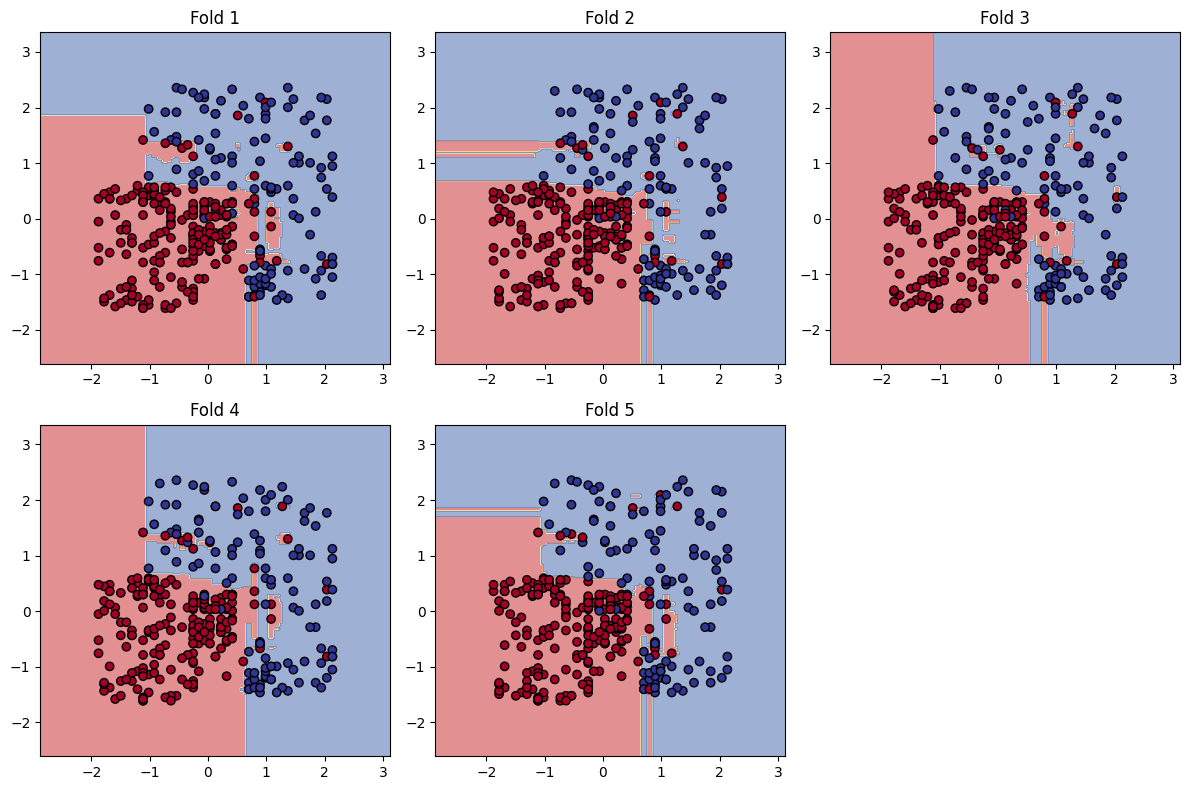

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Load the CSV file into a DataFrame
data = pd.read_csv('Social_Network_Ads.csv')

# Separating features and target variable
X = data[['Age', 'EstimatedSalary']]
y = data['Purchased']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the classifier
clf = RandomForestClassifier(random_state=42)

# Define the number of folds for cross-validation
num_folds = 5
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Function to plot decision boundary
def plot_decision_boundary(X, y, clf):
    h = 0.02  # step size in the mesh

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Train the classifier and plot decision boundary for each fold
    plt.figure(figsize=(12, 8))
    for i, (train_index, test_index) in enumerate(skf.split(X, y), 1):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        clf.fit(X_train, y_train)
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.subplot(2, 3, i)
        plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.5)
        plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdYlBu, edgecolor='k')
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title(f"Fold {i}")

    plt.tight_layout()
    plt.show()

# Plot decision boundary for each fold
plot_decision_boundary(X_scaled, y, clf)
